In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline



In [2]:
#export
from fastai import *
from fastai.text import *
import sys,os,os.path
import re

In [3]:
os.getcwd()

'/home/jupyter/mrdbarros/csgo_analyze'

DOWNLOAD DE DEMOS

In [4]:
#base_dir='/home/jupyter/mrdbarros/data/CSGO'
#export
base_dir='C:/Users/marcel.barros/Desktop/Projetos/data/CSGO'

In [2]:
#51716 - 51816
for id_demo in range(51650,51656):
    print("Downloading", id_demo)
    url= "https://www.hltv.org/download/demo/"+str(id_demo)
    new_dir=base_dir+"/"+str(id_demo)
    !mkdir {new_dir}
    file_name=base_dir+"/"+str(id_demo)+"/"+str(id_demo)
    !wget -O {file_name} {url}
    print("Unraring", id_demo)
    !unrar x {file_name} {new_dir}
    !rm -f {file_name}

mkdir: cannot create directory ‘C:/Users/marcel.barros/Desktop/Projetos/data/CSGO/51650’: No such file or directory
C:/Users/marcel.barros/Desktop/Projetos/data/CSGO/51650/51650: No such file or directory
Unraring 51650

UNRAR 5.71 freeware      Copyright (c) 1993-2019 Alexander Roshal

Cannot open C:/Users/marcel.barros/Desktop/Projetos/data/CSGO/51650/51650.rar
No such file or directory
No files to extract
mkdir: cannot create directory ‘C:/Users/marcel.barros/Desktop/Projetos/data/CSGO/51651’: No such file or directory
C:/Users/marcel.barros/Desktop/Projetos/data/CSGO/51651/51651: No such file or directory
Unraring 51651

UNRAR 5.71 freeware      Copyright (c) 1993-2019 Alexander Roshal

Cannot open C:/Users/marcel.barros/Desktop/Projetos/data/CSGO/51651/51651.rar
No such file or directory
No files to extract
mkdir: cannot create directory ‘C:/Users/marcel.barros/Desktop/Projetos/data/CSGO/51652’: No such file or directory
C:/Users/marcel.barros/Desktop/Projetos/data/CSGO/51652/5165

PROCESSAMENTO DE DEMOS

In [5]:
#export
#base_dir='C:/Users/marcel.barros/Desktop/Projetos/data/CSGO'
base_dir='/home/jupyter/mrdbarros/data/CSGO'
#dest_dir='C:/Users/marcel.barros/Desktop/Projetos/csgo_analyze/data/Raw'
dest_dir='/home/jupyter/mrdbarros/csgo_analyze/data/Raw'
tick_rate=128

In [6]:
#export
file_id = 0
delete_dir = dest_dir + "/*"
!rm -rf {delete_dir}
for r, d, f in os.walk(base_dir):
    for file in f:
        if '.dem' in file:
            full_file = os.path.join(r,file)
            !go run print_game_state.go {full_file} {file_id} {dest_dir} {tick_rate}
            file_id+=1

Map: de_train
Map: de_overpass
Map: de_mirage
Map: de_overpass
Map: de_mirage
Map: de_inferno
Map: de_inferno
Map: de_dust2
Map: de_overpass
Map: de_dust2
Map: de_overpass
error!Erro no processamento do arquivo! demo stream ended unexpectedly (ErrUnexpectedEndOfDemo)
Map: de_inferno
Map: de_mirage
Map: de_overpass
Map: de_train
Map: de_nuke
Map: de_nuke
Map: de_overpass
Map: de_inferno
Map: de_nuke
Map: de_inferno
Map: de_inferno
Map: de_dust2
Map: de_inferno
Map: de_inferno
Map: de_mirage
Map: de_mirage
Map: de_overpass
Map: de_mirage
Map: de_vertigo
Map: de_mirage
Map: de_dust2
Map: de_mirage
Map: de_mirage
Map: de_vertigo
Map: de_mirage
Map: de_mirage
Map: de_nuke
Map: de_dust2
Map: de_dust2
Map: de_nuke
Map: de_mirage
Map: de_mirage
Map: de_overpass
Map: de_train
Map: de_mirage
Map: de_overpass
Map: de_nuke
Map: de_nuke
Map: de_overpass
Map: de_overpass
Map: de_nuke
Map: de_overpass
Map: de_overpass
Map: de_mirage
Map: de_train
Map: de_mirage
Map: de_inferno
Map: de_nuke
Map: de_du

In [58]:
#export
bs=8


In [59]:
#export
path = "/home/jupyter/mrdbarros/csgo_analyze/data"
#path = "C:/Users/marcel.barros/Desktop/Projetos/csgo_analyze/data"

In [60]:
data_lm=None

In [61]:
#export
data_lm = (TextList.from_folder(path)
            .filter_by_folder(include=["Raw"]) 
            #.filter_by_folder(include=["de_dust2","de_inferno","de_mirage","de_nuke","de_overpass","de_train","de_vertigo","de_cache"]) 
            .split_by_rand_pct(0.2)
            .label_for_lm()           
            .databunch(bs=bs, num_workers=1))

len(data_lm.vocab.itos),len(data_lm.train_ds)

(656, 123)

In [10]:
data_lm.vocab.itos

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'x_coor',
 'y_coor',
 'z_coor',
 '0',
 'ct_2_pos',
 'ct_3_pos',
 'ct_1_pos',
 'ct_4_pos',
 'tr_3_pos',
 'tr_1_pos',
 'tr_2_pos',
 'tr_4_pos',
 'ct_5_pos',
 'tr_5_pos',
 '-8',
 '-20',
 '6',
 '4',
 '-6',
 '-10',
 '-17',
 '8',
 '1',
 '-13',
 '-3',
 '-5',
 '23',
 '-1',
 '5',
 '24',
 '14',
 '7',
 '-2',
 '588',
 't_flashbang',
 '-9',
 '3',
 '12',
 '21',
 '-15',
 'smoke_start',
 '-7',
 '2',
 '-11',
 '-12',
 '-31',
 '-4',
 '9',
 '-18',
 '16',
 't_glock_18',
 '17',
 't_knife',
 '-90',
 'ct_flashbang',
 '-38',
 'ct_p2000',
 't_smoke_grenade',
 'ct_kill',
 '-19',
 'ct_knife',
 '-14',
 '25',
 '26',
 '-37',
 '22',
 '19',
 '-49',
 '60',
 'ct_smoke_grenade',
 '-16',
 't_kill',
 '-21',
 '10',
 '27',
 '64',
 '-24',
 '-98',
 '20',
 '-97',
 '-25',
 '-51',
 '-40',
 '38',
 '28',
 '-48',
 't_c4',
 't_molotov',
 't_kevlar_+_helmet',
 '-46',
 '11',
 '36',
 '29',
 '-76',
 '-30',
 '118',
 '32',
 '68',
 '121',
 '33',
 '31'

In [26]:
data_lm

TextLMDataBunch;

Train: LabelList (123 items)
x: LMTextList
xxbos de_mirage freeze_time_end tr_1_pos x_coor 34 y_coor -85 z_coor -12 tr_2_pos x_coor 41 y_coor -56 z_coor -13 tr_3_pos x_coor 31 y_coor -67 z_coor -13 tr_4_pos x_coor 40 y_coor -63 z_coor -5 tr_5_pos x_coor 57 y_coor -59 z_coor -10 ct_1_pos x_coor -96 y_coor -13 z_coor -5 ct_2_pos x_coor -38 y_coor -104 z_coor -8 ct_3_pos x_coor -52 y_coor -20 z_coor -16 ct_4_pos x_coor -95 y_coor -18 z_coor -7 ct_5_pos x_coor -56 y_coor -33 z_coor -6 tr_1_pos x_coor 28 y_coor -82 z_coor -13 tr_2_pos x_coor 43 y_coor -51 z_coor -12 tr_3_pos x_coor 37 y_coor -59 z_coor -11 tr_4_pos x_coor 17 y_coor -84 z_coor -9 tr_5_pos x_coor 23 y_coor -84 z_coor -12 ct_1_pos x_coor -52 y_coor 9 z_coor -17 ct_2_pos x_coor -48 y_coor 9 z_coor -18 ct_3_pos x_coor -114 y_coor 32 z_coor -1 ct_4_pos x_coor -51 y_coor -125 z_coor -8 ct_5_pos x_coor -89 y_coor 40 z_coor -2 smoke_start x_coor -1 y_coor -4 z_coor 0 smoke_start x_coor -1 y_coor -4 z_coor 0 tr_1_po

In [68]:
#export
learn_lm = language_model_learner(data_lm, TransformerXL, drop_mult=1.,pretrained=False).to_fp16()

In [11]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


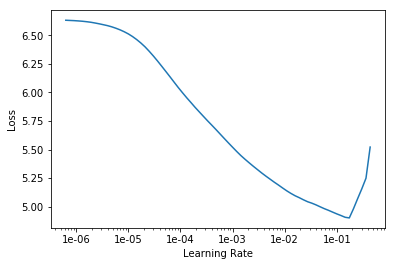

In [12]:
learn_lm.recorder.plot()

In [70]:
lr=1e-4

In [71]:
#export
learn_lm.fit_one_cycle(1, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.295212,1.261808,0.712893,18:08


In [15]:
learn_lm.fit_one_cycle(2, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.731214,1.701956,0.636164,13:54
1,1.652582,1.635012,0.642414,13:58


In [72]:
#export
learn_lm.data.vocab.save("fine_tuned_enc_vocab.pkl")
learn_lm.save_encoder("fine_tuned_enc2_bkp")

In [73]:
learn_lm = None

clas_vocab=data_lm.vocab
data_lm=None
torch.cuda.empty_cache()

In [14]:
#export
def cleanCSGOMatchFile(extractedMatchFilePath):
    f=open(extractedMatchFilePath,'r')
    contents = f.read()
    if len(contents)>50:
        re_map = re.compile("de_.*? ")
        #pdb.set_trace()
        print(extractedMatchFilePath,len(contents))
        current_map = re.findall(re_map,contents)[0]
        #print(contents)
        re_round = re.compile("(round_start(?! round_start).*?round_end_official)")
        all_rounds=re.findall(re_round,contents)
        labeled_samples=splitFullRounds(all_rounds,current_map)
        return labeled_samples
    else:
        !rm -f {extractedMatchFilePath}
    

In [15]:
#export
def splitFullRounds(fullRoundsList, current_map):
    labeled_samples=[]
    invalid_split_round_events=["t_round_win","ct_round_win","round_start","match_started"]
    re_lastEvent= re.compile("(.*) ")
    match_until_previous_round=""
    for one_round in fullRoundsList:
        split_round=re.findall(re_lastEvent,one_round[:int(len(one_round)/1.5)])[0]
        #pdb.set_trace()
        invalid_state_test=any(split_round_event in split_round[1:] for split_round_event in invalid_split_round_events)
        if not invalid_state_test:
            winner = "ct" if "ct_round_win" in one_round else "t"
            labeled_samples.append([current_map+" "+split_round,winner])
            match_until_previous_round+=" " + one_round
    return labeled_samples
        
        #print(x_events)

In [16]:
import pdb

In [17]:
delete_path = path+"/Processed/*"
print(delete_path)
!rm -rf {delete_path}

/home/jupyter/mrdbarros/csgo_analyze/data/Processed/*


In [18]:
#export


top_folders = ["train","valid"]
sub_folders  = ["t","ct"]
for top_folder in top_folders:
    for sub_folder in sub_folders:
        new_folder = path + "/Processed/" + top_folder + "/" + sub_folder
        !mkdir -p {new_folder}
valid_size = 0.2
for root, dir_names, files in os.walk(path+'/Raw'):
    for file in files:
        if ".txt" in file:
            #pdb.set_trace()
            parsed_match=cleanCSGOMatchFile(root+"/"+file)
            round_id=0
            folder = "valid" if random.random() < 0.2 else "train"
            if parsed_match:
                for parsed_round in parsed_match:
                    f= open(path+'/Processed/'+folder+"/"+parsed_round[1]+'/'+"r"+str(round_id)+"_"+file,"w+")
                    round_id+=1
                    f.write(parsed_round[0])
                    f.close()

/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_12.txt 445793
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_42.txt 137155
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_36.txt 233467
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_155.txt 418990
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_54.txt 208636
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_78.txt 381942
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_146.txt 175554
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_41.txt 244267
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_116.txt 175452
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_35.txt 81264
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_45.txt 277777
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_mirage/de_mirage_2.txt 261429
/home/jupyter/mrdbarros/csgo_analyze/da

/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_dust2/de_dust2_113.txt 236121
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_dust2/de_dust2_115.txt 192737
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_dust2/de_dust2_31.txt 320201
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_dust2/de_dust2_100.txt 424809
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_dust2/de_dust2_22.txt 377687
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_dust2/de_dust2_66.txt 148732
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_dust2/de_dust2_70.txt 148978
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_dust2/de_dust2_38.txt 166229
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_156.txt 260598
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_18.txt 373206
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_23.txt 469815
/home/jupyter/mrdbarros/csgo_analyze/data/Raw/de_inferno/de_inferno_24.txt 149712
/home/jupyter/mrdbarros/csgo_analyze/data/Ra

In [74]:
#export
def valid_train_split(file_name):
    #pdb.set_trace()
    return True if file_name.parents[1].stem == "valid" else False


data_clas = (TextList.from_folder(path, vocab=clas_vocab)
             .filter_by_folder(include=["Processed"]) 
             .split_by_valid_func(valid_train_split)
             .label_from_folder(classes=['t', 'ct'])
             .databunch(bs=bs, num_workers=1))

In [22]:
data_clas

TextClasDataBunch;

Train: LabelList (3295 items)
x: TextList
xxbos de_inferno round_start ct_0 t_2 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 ct_knife ct_p2000 t_c4 tr_1_pos x_coor -75 y_coor 33 z_coor -2 tr_2_pos x_coor -79 y_coor 22 z_coor -3 tr_3_pos x_coor -79 y_coor 34 z_coor -2 tr_4_pos x_coor -76 y_coor 21 z_coor -3 tr_5_pos x_coor -74 y_coor 24 z_coor -3 ct_1_pos x_coor 114 y_coor 101 z_coor 6 ct_2_pos x_coor 118 y_coor 103 z_coor 6 ct_3_pos x_coor 122 y_coor 100 z_coor 6 ct_4_pos x_coor 123 y_coor 104 z_coor 6 ct_5_pos x_coor 118 y_coor 99 z_coor 6 t_smoke_grenade ct_p2000 t_he_grenade ct_desert_eagle ct_dual_barettas ct_dual_barettas ct_p2000 ct_p250 tr_1_pos x_coor -74 y_coor 24 z_coor -3 tr_2_pos x_coor -79 y_coor 34 z_coor -2 tr_3_pos x_coor -76 y_coor 21 z_coor -3 tr_4_pos x_coor -79 y_coor 22 z_coor -3 tr_5_pos x_coor -75 y_coor 33 z_coor -2 ct_2_pos x_coor 123 y_coor 104 z_coor 6 ct_4_pos x_coor 118 y_coor 103 z_coor 6 time_event_40 tr_1_pos x_coor -75 y_co

In [9]:
data_clas.show_batch()

text,target
xxbos de_dust2 round_start ct_3 t_3 t_knife t_glock_18 t_awp t_molotov ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_c4 tr_1_pos x_coor -49 y_coor -37 z_coor 6 tr_2_pos x_coor -42 y_coor -36 z_coor 6 tr_3_pos x_coor -50 y_coor -40 z_coor 5 tr_4_pos x_coor -18 y_coor -40 z_coor 4 ct_1_pos x_coor 17 y_coor 117 z_coor -6 ct_2_pos x_coor 9 y_coor 121 z_coor -6 ct_3_pos x_coor 12 y_coor,t
xxbos de_vertigo round_start ct_7 t_8 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_c4 t_kevlar_vest tr_1_pos x_coor -67 y_coor -73 z_coor 574 tr_2_pos x_coor -62 y_coor -70 z_coor 574 tr_3_pos x_coor -69 y_coor -70 z_coor 574 tr_4_pos x_coor -65 y_coor -70 z_coor 574 tr_5_pos x_coor -62 y_coor -67 z_coor 574 ct_1_pos x_coor -52 y_coor 38 z_coor 588 ct_2_pos,t
xxbos de_nuke round_start ct_8 t_7 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 t_knife t_glock_18 t_c4 tr_1_pos x_coor -91 y_coor -58 z_coor -20 tr_2_pos x_coor -97 y_coor -48 z_coor -20 tr_3_pos x_coor -96 y_coor -51 z_coor -20 tr_4_pos x_coor -90 y_coor -51 z_coor -20 tr_5_pos x_coor -97 y_coor -55 z_coor -20 ct_1_pos x_coor 125 y_coor -17 z_coor -17 ct_2_pos x_coor,ct
xxbos de_mirage round_start ct_13 t_4 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 ct_knife ct_p2000 ct_knife ct_p2000 t_c4 ct_kevlar_+_helmet ct_defuse_kit t_kevlar_+_helmet ct_m4a4 tr_1_pos x_coor 56 y_coor 1 z_coor -8 tr_2_pos x_coor 64 y_coor -17 z_coor -8 tr_3_pos x_coor 64 y_coor -8 z_coor -8 tr_4_pos x_coor 68 y_coor -5 z_coor -8 tr_5_pos x_coor 68 y_coor -10 z_coor -8 ct_1_pos x_coor -88 y_coor -90 z_coor -13,t
xxbos de_dust2 round_start ct_8 t_3 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 t_c4 ct_incendiary_grenade tr_1_pos x_coor -26 y_coor -37 z_coor 5 tr_2_pos x_coor -49 y_coor -37 z_coor 6 tr_3_pos x_coor -41 y_coor -39 z_coor 5 tr_4_pos x_coor -42 y_coor -36 z_coor 6 tr_5_pos x_coor -24 y_coor -40 z_coor 5 ct_1_pos x_coor 8 y_coor 118 z_coor -5 ct_2_pos x_coor 17 y_coor 117 z_coor -6 ct_3_pos x_coor 12 y_coor,t


In [75]:
#export
learn = text_classifier_learner(data_clas, TransformerXL, drop_mult=0.5).to_fp16()
#pdb.set_trace()
learn.load_encoder('fine_tuned_enc2')

In [86]:
torch.cuda.empty_cache()

In [87]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


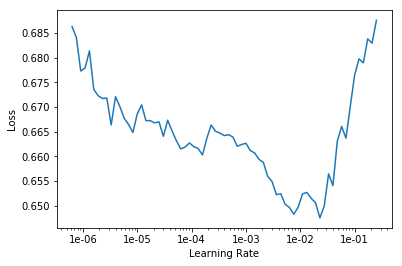

In [88]:
learn.recorder.plot(skip_end = 15)

In [84]:
lr=5e-6

In [81]:
#export
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.669514,0.661528,0.599676,03:48


In [28]:
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.614951,0.629914,0.649919,03:26


In [29]:
learn.fit_one_cycle(1, lr/10)

epoch,train_loss,valid_loss,accuracy,time
0,0.590303,0.622199,0.638574,03:17


In [31]:
learn.save("class_before_unf_fp16", with_opt=False)

In [48]:
learn.freeze_to(-2)

In [90]:
learn.fit_one_cycle(1,max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.647567,0.650956,0.625608,03:58


In [91]:
learn.export('initial_clas.pkl')

In [94]:
test_round = "de_inferno  round_start ct_3 t_2 ct_knife ct_p2000 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 t_knife t_glock_18 t_knife t_glock_18 ct_knife ct_p2000 t_knife t_glock_18 t_c4 tr_1_pos x_coor -83 y_coor 14 z_coor -3 tr_2_pos x_coor -79 y_coor 22 z_coor -3 tr_3_pos x_coor -80 y_coor 38 z_coor -2 tr_4_pos x_coor -77 y_coor 36 z_coor -2 tr_5_pos x_coor -85 y_coor 33 z_coor -2 ct_1_pos x_coor 123 y_coor 104 z_coor 6 ct_2_pos x_coor 122 y_coor 100 z_coor 6 ct_3_pos x_coor 118 y_coor 99 z_coor 6 ct_4_pos x_coor 118 y_coor 103 z_coor 6 ct_5_pos x_coor 114 y_coor 101 z_coor 6 time_event_16 ct_m4a4 ct_kevlar_+_helmet ct_kevlar_+_helmet ct_smoke_grenade ct_flashbang ct_he_grenade ct_incendiary_grenade ct_incendiary_grenade ct_smoke_grenade ct_incendiary_grenade ct_smoke_grenade ct_flashbang ct_flashbang ct_flashbang ct_awp ct_kevlar_vest ct_kevlar_+_helmet ct_defuse_kit ct_m4a4 ct_smoke_grenade ct_flashbang ct_incendiary_grenade ct_kevlar_+_helmet ct_he_grenade ct_defuse_kit tr_2_pos x_coor -77 y_coor 36 z_coor -2 tr_4_pos x_coor -85 y_coor 33 z_coor -2 tr_5_pos x_coor -79 y_coor 22 z_coor -3 ct_1_pos x_coor 122 y_coor 100 z_coor 6 ct_2_pos x_coor 118 y_coor 103 z_coor 6 ct_3_pos x_coor 123 y_coor 104 z_coor 6 ct_4_pos x_coor 118 y_coor 99 z_coor 6 t_p250 t_kevlar_+_helmet t_desert_eagle t_smoke_grenade t_molotov t_flashbang t_flashbang t_desert_eagle t_desert_eagle freeze_time_end time_event_0 t_kevlar_+_helmet t_p250 t_smoke_grenade t_kevlar_+_helmet t_flashbang tr_1_pos x_coor -28 y_coor 29 z_coor 4 tr_2_pos x_coor -44 y_coor -14 z_coor 0 tr_3_pos x_coor -43 y_coor 39 z_coor -1 tr_4_pos x_coor -40 y_coor -14 z_coor 0 tr_5_pos x_coor -74 y_coor 0 z_coor -3 ct_1_pos x_coor 117 y_coor 41 z_coor 7 ct_2_pos x_coor 111 y_coor 36 z_coor 7 ct_3_pos x_coor 60 y_coor 136 z_coor 6 ct_4_pos x_coor 63 y_coor 139 z_coor 6 ct_5_pos x_coor 75 y_coor 50 z_coor 7 smoke_start x_coor 3 y_coor 1 z_coor 0 t_c4 smoke_start x_coor 0 y_coor 2 z_coor 0 tr_1_pos x_coor 48 y_coor 27 z_coor 4 tr_2_pos x_coor 43 y_coor 5 z_coor 10 tr_3_pos x_coor 36 y_coor 0 z_coor 4 tr_4_pos x_coor -29 y_coor -3 z_coor 0 tr_5_pos x_coor 23 y_coor 27 z_coor 4 ct_1_pos x_coor 25 y_coor 96 z_coor 6 ct_2_pos x_coor 78 y_coor -3 z_coor 6 ct_3_pos x_coor 118 y_coor -9 z_coor 5 ct_4_pos x_coor 76 y_coor 52 z_coor 7 ct_5_pos x_coor 47 y_coor 135 z_coor 7 time_event_4 t_kill t_awp t_kill t_kill tr_1_pos x_coor 45 y_coor 22 z_coor 4 tr_2_pos x_coor 68 y_coor 6 z_coor 6 tr_3_pos x_coor 73 y_coor 58 z_coor 8 tr_4_pos x_coor 101 y_coor 55 z_coor 7 tr_5_pos x_coor 70 y_coor 53 z_coor 7 ct_1_pos x_coor 10 y_coor 60 z_coor 5 ct_2_pos x_coor 81 y_coor 93 z_coor 8 ct_3_pos x_coor 118 y_coor 48 z_coor 11 ct_4_pos x_coor 10 y_coor 60 z_coor 5 ct_5_pos x_coor 88 y_coor 1 z_coor 8 t_ak_47 t_smoke_grenade t_m4a4 t_flashbang t_kill bomb_plant_begin ct_kill bomb_planted tr_1_pos x_coor 103 y_coor 9 z_coor 8 tr_2_pos x_coor 72 y_coor 34 z_coor 10 tr_3_pos x_coor 117 y_coor 3 z_coor 6 tr_4_pos x_coor 130 y_coor 72 z_coor 8 tr_5_pos x_coor 96 y_coor 53 z_coor 8 ct_1_pos x_coor 37 y_coor 16 z_coor 4 ct_2_pos x_coor 37 y_coor 16 z_coor 4 ct_3_pos x_coor 37 y_coor 16 z_coor 4 ct_4_pos x_coor 37 y_coor 16 z_coor 4 ct_5_pos x_coor 37 y_coor 16 z_coor 4 time_event_8"

In [95]:
splitted_round = test_round.split()
current_round_state=""
for word in splitted_round:
    current_round_state += word + " "
    print(word,"-",learn.predict(current_round_state))

de_inferno - (Category t, tensor(0), tensor([0.6496, 0.3504]))
round_start - (Category t, tensor(0), tensor([0.7383, 0.2617]))
ct_3 - (Category t, tensor(0), tensor([0.7591, 0.2409]))
t_2 - (Category t, tensor(0), tensor([0.5874, 0.4126]))
ct_knife - (Category ct, tensor(1), tensor([0.3337, 0.6663]))
ct_p2000 - (Category t, tensor(0), tensor([0.7898, 0.2102]))
t_knife - (Category t, tensor(0), tensor([0.5990, 0.4010]))
t_glock_18 - (Category t, tensor(0), tensor([0.5630, 0.4370]))
ct_knife - (Category ct, tensor(1), tensor([0.4185, 0.5815]))
ct_p2000 - (Category t, tensor(0), tensor([0.6908, 0.3092]))
t_knife - (Category t, tensor(0), tensor([0.5466, 0.4534]))
t_glock_18 - (Category t, tensor(0), tensor([0.5367, 0.4633]))
t_knife - (Category ct, tensor(1), tensor([0.4383, 0.5617]))
t_glock_18 - (Category ct, tensor(1), tensor([0.4470, 0.5530]))
t_knife - (Category ct, tensor(1), tensor([0.3706, 0.6294]))
t_glock_18 - (Category ct, tensor(1), tensor([0.3831, 0.6169]))
ct_knife - (Catego

-3 - (Category ct, tensor(1), tensor([0.1477, 0.8523]))
ct_1_pos - (Category ct, tensor(1), tensor([0.1508, 0.8492]))
x_coor - (Category ct, tensor(1), tensor([0.1451, 0.8549]))
122 - (Category ct, tensor(1), tensor([0.1644, 0.8356]))
y_coor - (Category ct, tensor(1), tensor([0.1471, 0.8529]))
100 - (Category ct, tensor(1), tensor([0.1573, 0.8427]))
z_coor - (Category ct, tensor(1), tensor([0.1840, 0.8160]))
6 - (Category ct, tensor(1), tensor([0.1347, 0.8653]))
ct_2_pos - (Category ct, tensor(1), tensor([0.1639, 0.8361]))
x_coor - (Category ct, tensor(1), tensor([0.1711, 0.8289]))
118 - (Category ct, tensor(1), tensor([0.1751, 0.8249]))
y_coor - (Category ct, tensor(1), tensor([0.1493, 0.8507]))
103 - (Category ct, tensor(1), tensor([0.1684, 0.8316]))
z_coor - (Category ct, tensor(1), tensor([0.1648, 0.8352]))
6 - (Category ct, tensor(1), tensor([0.1211, 0.8789]))
ct_3_pos - (Category ct, tensor(1), tensor([0.1720, 0.8280]))
x_coor - (Category ct, tensor(1), tensor([0.1988, 0.8012]))


x_coor - (Category ct, tensor(1), tensor([0.2401, 0.7599]))
43 - (Category ct, tensor(1), tensor([0.3336, 0.6664]))
y_coor - (Category ct, tensor(1), tensor([0.2708, 0.7292]))
5 - (Category ct, tensor(1), tensor([0.3157, 0.6843]))
z_coor - (Category ct, tensor(1), tensor([0.2682, 0.7318]))
10 - (Category ct, tensor(1), tensor([0.2946, 0.7054]))
tr_3_pos - (Category ct, tensor(1), tensor([0.3134, 0.6866]))
x_coor - (Category ct, tensor(1), tensor([0.2744, 0.7256]))
36 - (Category ct, tensor(1), tensor([0.3428, 0.6572]))
y_coor - (Category ct, tensor(1), tensor([0.3176, 0.6824]))
0 - (Category ct, tensor(1), tensor([0.3252, 0.6748]))
z_coor - (Category ct, tensor(1), tensor([0.2819, 0.7181]))
4 - (Category ct, tensor(1), tensor([0.3054, 0.6946]))
tr_4_pos - (Category ct, tensor(1), tensor([0.3223, 0.6777]))
x_coor - (Category ct, tensor(1), tensor([0.2920, 0.7080]))
-29 - (Category ct, tensor(1), tensor([0.3538, 0.6462]))
y_coor - (Category ct, tensor(1), tensor([0.2851, 0.7149]))
-3 - (

t_flashbang - (Category ct, tensor(1), tensor([0.3145, 0.6855]))
t_kill - (Category ct, tensor(1), tensor([0.3323, 0.6677]))
bomb_plant_begin - (Category ct, tensor(1), tensor([0.2935, 0.7065]))
ct_kill - (Category ct, tensor(1), tensor([0.2720, 0.7280]))
bomb_planted - (Category ct, tensor(1), tensor([0.3261, 0.6739]))
tr_1_pos - (Category ct, tensor(1), tensor([0.3928, 0.6072]))
x_coor - (Category ct, tensor(1), tensor([0.3246, 0.6754]))
103 - (Category ct, tensor(1), tensor([0.4284, 0.5716]))
y_coor - (Category ct, tensor(1), tensor([0.4246, 0.5754]))
9 - (Category ct, tensor(1), tensor([0.4012, 0.5988]))
z_coor - (Category ct, tensor(1), tensor([0.4148, 0.5852]))
8 - (Category ct, tensor(1), tensor([0.3732, 0.6268]))
tr_2_pos - (Category ct, tensor(1), tensor([0.3965, 0.6035]))
x_coor - (Category ct, tensor(1), tensor([0.3323, 0.6677]))
72 - (Category ct, tensor(1), tensor([0.4345, 0.5655]))
y_coor - (Category ct, tensor(1), tensor([0.3451, 0.6549]))
34 - (Category ct, tensor(1), t

In [71]:

#learn.data.vocab.save('initial_clas_vocab.pkl')

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-5))

In [ ]:
learn.to_fp32().save("class_before_unf", with_opt=False)
learn.data.vocab.save(mdl_path/(lm_fns[1] + '.pkl'))